In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### Read Images

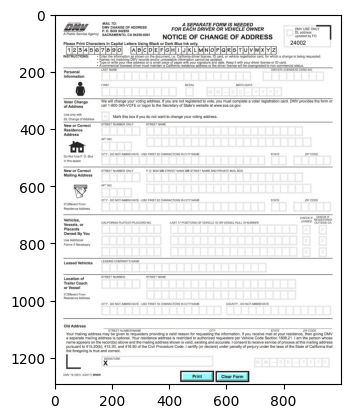

In [2]:
ref = cv2.imread('/Users/suryasaikadali/Downloads/open_Cv/CVIP/M7/images/form.jpg',1)
plt.imshow(ref[...,::-1])
plt.show()

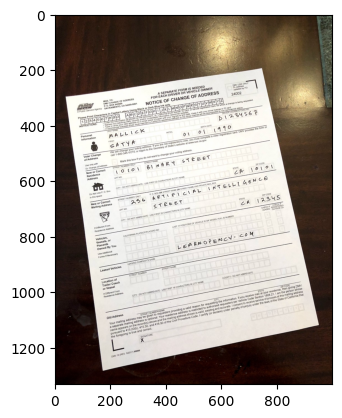

In [3]:
img = cv2.imread('/Users/suryasaikadali/Downloads/open_Cv/CVIP/M7/images/scanned-form.jpg',1)
plt.imshow(img[...,::-1])
plt.show()


### Detect Features

In [4]:
max_features = 500
good_match_percent = 0.15

# convert images to greyscale
im1gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im2gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Detect orb features and compute descriptors
orb = cv2.ORB_create(max_features)
kp1, des1 = orb.detectAndCompute(im1gray, None)
kp2, des2 = orb.detectAndCompute(im2gray, None)


### Match Features

In [5]:
# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2, None)

# sort matches by score
matches = sorted(matches, key = lambda x: x.distance, reverse = False)

# Remove not so good matches
numGoodMatches = int(len(matches) * good_match_percent)
matches = matches[:numGoodMatches]

# draw top matches
immatches = cv2.drawMatches(img, kp1,
                            ref, kp2,
                            matches, None)
cv2.imwrite('/Users/suryasaikadali/Downloads/open_Cv/CVIP/M7/images/matches_1.jpg', immatches)

True

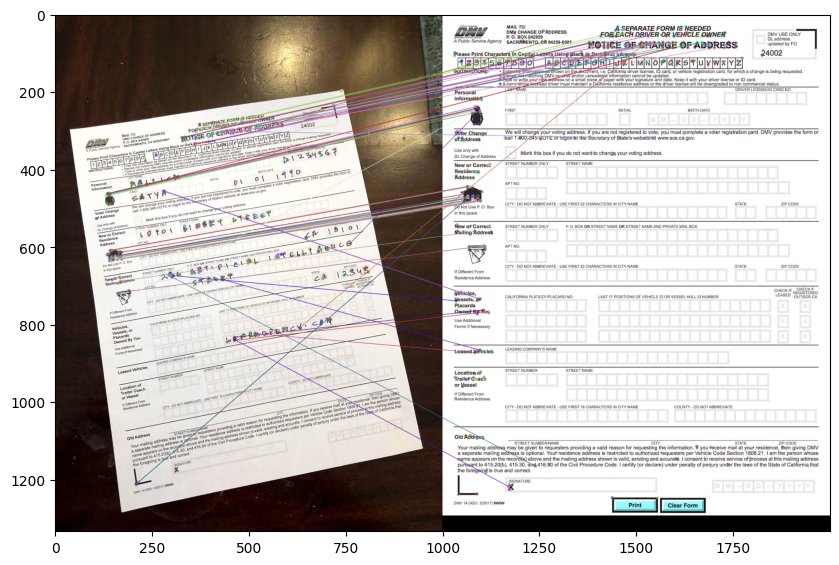

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(immatches[...,::-1])
plt.show()

### Calculate Homography

In [7]:
p1 = np.zeros((len(matches), 2), dtype = np.float32)
p2 = np.zeros((len(matches), 2), dtype = np.float32)

for i, match in enumerate(matches):
    p1[i,:] = kp1[match.queryIdx].pt
    p2[i,:] = kp2[match.trainIdx].pt

# find homography
h, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

### warping image

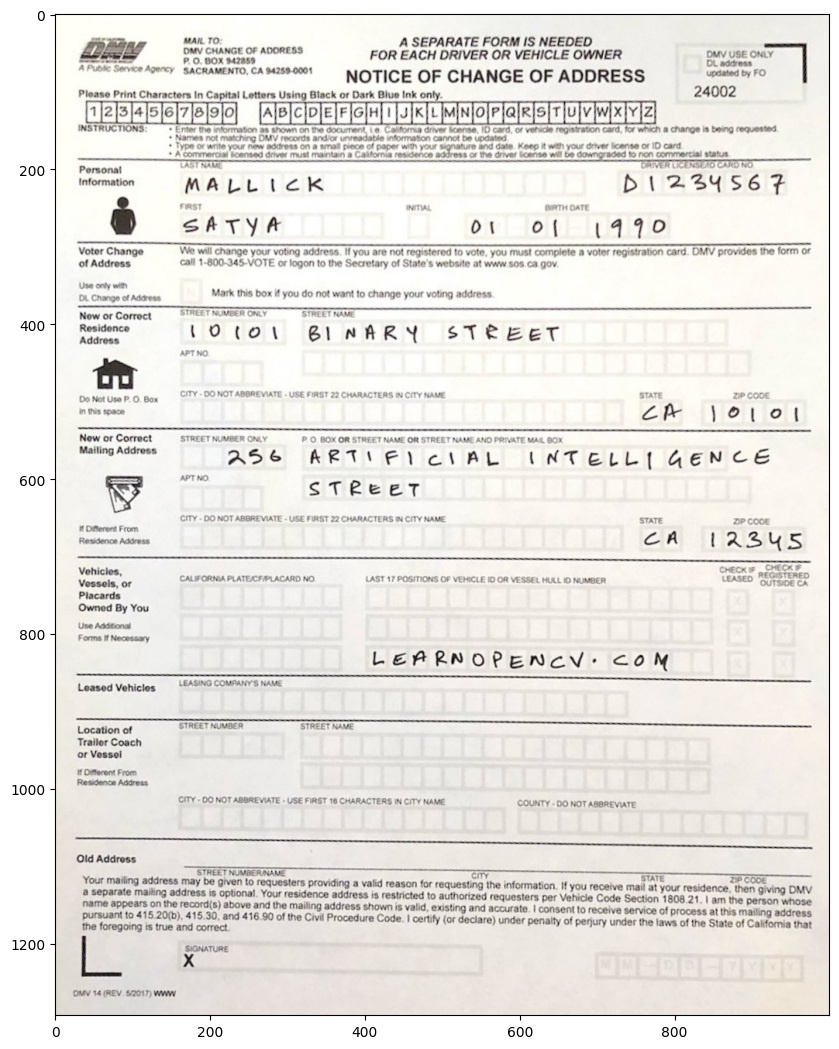

In [8]:
# use homography
plt.figure(figsize = (10,13))
height, width , channels = ref.shape
img_reg = cv2.warpPerspective(img, h, (width, height))
plt.imshow(img_reg[...,::-1])
plt.show()